<div style="direction:rtl; text-align:right">

# How many bicycles will be rented during the next month?

<div style="direction:rtl; text-align:right">
In this project, we will explore together a unique data of bicycle rental data in Washington DC, the capital of the United States of America. This project aims to delve into the steps of data analysis. The goal of the project is to first understand the data and then try to model the data by predicting how many bicycles will be rented during the next month, using the data of previous years.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# Read data

In [4]:
data = pd.read_csv('bike-train.csv')

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<div style="direction:rtl; text-align:right">
First, let's find out the general picture of this data. How many rows and how many columns? Type the commands that perform this task.

In [65]:

data.shape
nrows = len(data.index)
ncols = len(data.columns)


<div style="direction:rtl; text-align:right">
    The rows represent reading data for approximately every hour during 2011 and 2012. With each reading we find many additional data such as: season, holiday or not, working day or not? (workingday), weather (temp), atemp, wind speed, casual rent, registered, total rent (count).
We'll first look at the "types" of data and whether or not we have any missing data.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<div style="direction:rtl; text-align:right">
Here we are going to tell Panda that the datetime column is a datetime variable so that we can perform some operations later

In [38]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<div style="direction:rtl; text-align:right">
Let's print the total rental times during the first ten days:

In [1]:
data[:24*10].plot(x='datetime', y='count') # 24 hours * 10 days

NameError: name 'data' is not defined

<div style="direction:rtl; text-align:right">

# data processing

<div style="direction:rtl; text-align:right">
The first step in cleaning the data is to convert categorical data (eg season, holiday, weather) into independent columns. We care a lot about this step, especially in the case of modeling. We will use the get_dummies command to perform this task.

In [41]:
season_dummies = pd.get_dummies(data['season'], prefix='season', drop_first=False)
data = pd.concat([data, season_dummies], axis=1) # axis =1 means add new columns
weather_dummies = pd.get_dummies(data['weather'], prefix='weather', drop_first=False)
data = pd.concat([data, weather_dummies], axis=1) # axis =1 means add new columns

In [42]:


cols_to_drop = ['weather','season', 'casual', 'registered']
# drop columns here
data.drop(columns=cols_to_drop, inplace=True)


<div style="direction:rtl; text-align:right">
The second step in data processing is data scaling. This step aims to standardize the variance of the data. Note that we first save the mean and standard deviation, which we use later to normalize the new data.

In [43]:
quant_features = ['temp', 'humidity', 'windspeed'] # those are all numerical columns..
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [44]:
for col in quant_features:
    print(data[col].mean())

1.1189428545540056e-14
-1.423677963646415e-16
-4.8258506628015964e-14


<div style="direction:rtl; text-align:right">
In order to understand the effect of data normalization, we will now calculate the arithmetic mean and standard deviation of the previous columns. What do you conclude?

In [45]:


for col in quant_features:
    mean = data[col].mean()
    std  = data[col].std()
    print('mean of {} is {} and the standard deviation is {}'.format(col, mean, std))

mean of temp is 1.1189428545540056e-14 and the standard deviation is 1.000000000000019
mean of humidity is -1.423677963646415e-16 and the standard deviation is 0.9999999999999879
mean of windspeed is -4.8258506628015964e-14 and the standard deviation is 1.0000000000000226


In [46]:
data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,-1.333599,14.395,0.993167,-1.567682,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,-1.438841,13.635,0.941206,-1.567682,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,-1.438841,13.635,0.941206,-1.567682,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,-1.333599,14.395,0.681399,-1.567682,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,-1.333599,14.395,0.681399,-1.567682,1,1,0,0,0,1,0,0,0


<div style="direction:rtl; text-align:right">
Finally, the third step is in extracting historical data such as hour, day, month and year. All this is possible using pandas library commands.

In [47]:
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month

<div style="direction:rtl; text-align:right">
Then we delete the original date and time column after extracting useful information from it.

In [48]:


col_to_delete = ['datetime']

data.drop(['datetime'], axis = 1, inplace = True)


In [49]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month
0,0,0,-1.333599,14.395,0.993167,-1.567682,16,1,0,0,0,1,0,0,0,0,1,1
1,0,0,-1.438841,13.635,0.941206,-1.567682,40,1,0,0,0,1,0,0,0,1,1,1
2,0,0,-1.438841,13.635,0.941206,-1.567682,32,1,0,0,0,1,0,0,0,2,1,1
3,0,0,-1.333599,14.395,0.681399,-1.567682,13,1,0,0,0,1,0,0,0,3,1,1
4,0,0,-1.333599,14.395,0.681399,-1.567682,1,1,0,0,0,1,0,0,0,4,1,1


<div style="direction:rtl; text-align:right">
Now we will make simple graphs of the average number of rents per hour and per month. To set up these graphs, we will first summarize the data using groupby and then plot the data using a plot:

In [50]:
count_per_hour = data.groupby('hour')['count'].mean()

In [51]:
count_per_hour.head()

hour
0    55.138462
1    33.859031
2    22.899554
3    11.757506
4     6.407240
Name: count, dtype: float64

<AxesSubplot:xlabel='hour'>

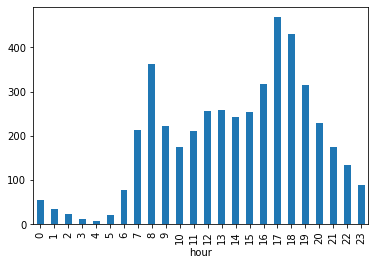

In [52]:
count_per_hour.plot(kind='bar')

#or..
#count_per_hour.plot.bar()

<div style="direction:rtl; text-align:right">
We will now plot the rental times by month.

<AxesSubplot:xlabel='month'>

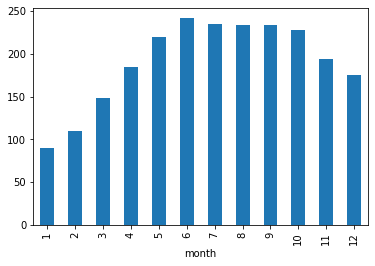

In [53]:

count_per_month = data.groupby('month')['count'].mean()
count_per_month.plot(kind='bar')


<div style="direction:rtl; text-align:right">

# data modeling

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

<div style="direction:rtl; text-align:right">
The easiest and fastest way to see the performance of the model is by using the cross_val_score command. This command splits the data into training data and select data using cross validation and then modeling without any need for intervention. Next, we'll print the error rate to generally know the average performance of the model before applying it to new data. We will learn more about the validation methods for models later:

In [55]:
features = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'day', 'month']

In [56]:
target = ['count']

In [57]:
scores = cross_val_score(X=data[features],
                         y=data[target].values, 
                         estimator=DecisionTreeRegressor(),
                         scoring='neg_mean_squared_error',
                         cv=5)

In [58]:
scores.mean()

-17949.56042742538

In [59]:
model = DecisionTreeRegressor()
model.fit(data[features], data[target])

DecisionTreeRegressor()

In [60]:
test = pd.read_csv('bike-test.csv')
test['datetime'] = pd.to_datetime(test['datetime'])
season_dummies = pd.get_dummies(test['season'], prefix='season', drop_first=False)
test = pd.concat([test, season_dummies], axis=1) # axis =1 means add new columns
weather_dummies = pd.get_dummies(test['weather'], prefix='weather', drop_first=False)
test = pd.concat([test, weather_dummies], axis=1) # axis =1 means add new columns
for each in quant_features:
    data.loc[:, each] = (data[each] - scaled_features[each][0]) / scaled_features[each][1]
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

<div style="direction:rtl; text-align:right">
Here we will use the previous model to predict rental times in the test data:

In [61]:
predictions = model.predict(test[features])

In [62]:
test['count'] = predictions

In [63]:
test[['datetime', 'count']].head()

,datetime,count
0,2011-01-20 00:00:00,15.0
1,2011-01-20 01:00:00,3.0
2,2011-01-20 02:00:00,7.0
3,2011-01-20 03:00:00,1.0
4,2011-01-20 04:00:00,1.0


In [64]:
test[['datetime', 'count']].to_csv('submission.csv', index=False)